In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data_or = pd.read_csv('GSPC.csv')

252


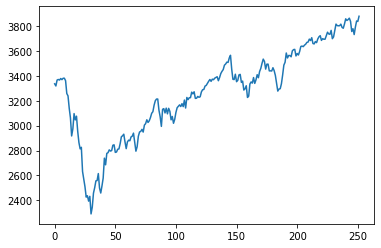

In [2]:
data = data_or['Open']
print(len(data))
plt.plot(data)
plt.show()

Assume we want to 8 piece, lets cut the whole graph in these intervals:
    [6:30] [30:84], [84:87],[87:90],[90:98],[98:145],[145:159],[159:172],[172:184],[184:250]

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

Using polynomial regression with seeting the order of polynomial = 3. Here is the regression function:
$$f(x) = a_0 + a_1 x + a_2 x^2 + a_3 x^3$$

In [4]:
transformer = PolynomialFeatures(degree=3, include_bias=False)
def picese_transform(picese_interval,picese):
    a,b = picese_interval[0],picese_interval[1]
    picese_int = np.linspace(a,b-1,b-a).reshape(-1, 1)
    picese_trans = transformer.fit_transform(picese_int)
    model = LinearRegression().fit(picese_trans, picese)
    coef = model.coef_
    inter = model.intercept_
    return [coef, inter]

In [5]:
order = [6,30,84,87,90,98,145,159,172,184,250]
result = []
for i in range(len(order)-1):
    picese_int = [order[i],order[i+1]]
    picese = data[picese_int[0]:picese_int[1]]
    result_temp = picese_transform(picese_int, picese)
    result.append(result_temp)

In [6]:
print('the vectors results are (a1,a2,a3,a0): ')
for i in result:
    print(i)

the vectors results are (a1,a2,a3,a0): 
[array([-3.65750882e+01,  2.21710851e-01, -1.69477936e-02]), 3618.0323927759705]
[array([ 1.86279516e+02, -3.06264242e+00,  1.71475029e-02]), -982.0434587548534]
[array([ 0.52315408, 44.46466936, -0.35082174]), -102639.88524947454]
[array([  -1.21502744, -106.91473973,    0.81126799]), 278192.0075371172]
[array([-7.39780747e+03,  8.09364357e+01, -2.95251710e-01]), 228582.85283677865]
[array([ 3.32012011e+02, -2.72506483e+00,  7.59985728e-03]), -10454.484473961042]
[array([-3.39539925e+04,  2.23238351e+02, -4.89217966e-01]), 1724713.4605711016]
[array([ 4.15744248e+04, -2.51660281e+02,  5.07858311e-01]), -2286321.4025763217]
[array([-4.83644783e+04,  2.72975983e+02, -5.13584457e-01]), 2859855.244225504]
[array([ 5.82245190e+02, -2.55580840e+00,  3.75743374e-03]), -40678.223217667466]


In [7]:
def picese_plot(x_interval,par):
    para = result[par]
    f_x = []
    for i in x_interval:
        f_temp = para[0][0]*i + para[0][1]*i**2 + para[0][2]*i**3 + para[1]
        f_x.append(f_temp)
    plt.plot(x_interval,f_x,'r')

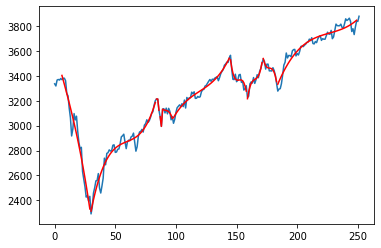

In [8]:
x_list = np.linspace(0,250,251)
plt.plot(data)
for i in range(len(order) - 1):
    start = order[i]
    end = order[i+1]
    x_temp = x_list[start:end]
    picese_plot(x_temp,i)
plt.show()

Using the K-means cluster: keeps only three points: minimum, maximum, median

In [9]:
from sklearn.cluster import KMeans
def k_three(picese_int,picese):
    a,b = picese_int[0],picese_int[1]
    picese_int = np.linspace(a,b-1,b-a).reshape(-1, 1)
    picese = np.array(picese).reshape(-1,1)

    picese_comb = np.concatenate((picese_int,picese), axis = 1)
    kmeans = KMeans(n_clusters = 3).fit(picese_comb)
    centers = kmeans.cluster_centers_
    return centers

In [10]:
order = [6,30,84,87,90,98,145,159,172,184,250]
center_list = []
for i in range(len(order)-1):
    picese_int = [order[i],order[i+1]]
    picese = data[picese_int[0]:picese_int[1]]
    result_temp = k_three(picese_int,picese)
    center_list.append(result_temp)

In [11]:
print(center_list)

[array([[  26.        , 2485.288574  ],
       [  17.        , 2978.97270055],
       [   8.5       , 3331.1549885 ]]), array([[  56.53125   , 2850.42561347],
       [  35.        , 2488.50636973],
       [  77.90909091, 3067.20363536]]), array([[  84.      , 3213.320068],
       [  86.      , 3123.530029],
       [  85.      , 3213.419922]]), array([[  87.      , 3071.040039],
       [  88.      , 2993.76001 ],
       [  89.      , 3131.      ]]), array([[  92.        , 3138.373291  ],
       [  96.5       , 3059.9000245 ],
       [  93.        , 3103.48657233]]), array([[ 116.44444444, 3250.21001522],
       [ 135.        , 3416.58789058],
       [ 102.6       , 3126.2899902 ]]), array([[ 152.88888889, 3340.40334733],
       [ 145.        , 3564.73999   ],
       [ 150.        , 3421.28002925]]), array([[ 164.5      , 3363.926239 ],
       [ 170.       , 3464.656657 ],
       [ 159.5      , 3231.3999025]]), array([[ 178.71428571, 3440.13992743],
       [ 174.        , 3509.15997325],

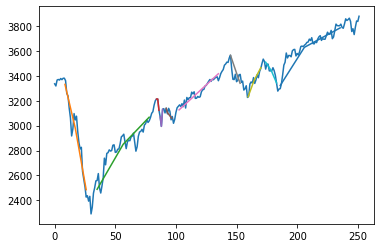

In [12]:
plt.plot(data)
for i in center_list:
    sor = np.argsort(i[:,0])
    sort_center = i[sor]
    plt.plot(sort_center[:,0],sort_center[:,1])
plt.show()

Plot the three centers of K-means for each picese

# problem 2

### The company I think will hold the great future is DJI

This is drone product company which holds more than 70% in the global drone market and has a strong competitive in A.I area especally in image recognition. Their high intelligence drones have widely used in airport, mountain exploration, etc.

In the future, it is true the government needs some law to manage those precarious drone flight, such as some unknow drone fly around airport. But the drone still will play an important role in the future life.